In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import time

In [4]:
# Load the dataset
dataset = pd.read_csv("Final_merged_data.csv", sep=",")


In [5]:
dataset_final = dataset.drop('Country', axis=1)

In [6]:
# Get features (X) and target variable (Y)
X = dataset_final.drop('Yield (hg/ha)', axis=1)
Y = dataset_final['Yield (hg/ha)']

In [7]:
X_enc = pd.get_dummies(dataset_final, columns=['Item'])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y, test_size=0.2, random_state=42)

In [9]:
start_training_time = time.time()
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, Y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time

In [10]:
start_pred_time = time.time()
Y_pred = naive_bayes_model.predict(X_test)
end_pred_time = time.time()
prediction_time = end_pred_time - start_pred_time

In [11]:
print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 0.07 seconds
Prediction Time: 0.07072 seconds


In [12]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 102637008.28


In [13]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error

In [14]:
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
max_err = max_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

In [15]:
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_err:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R-squared (R2): 1.00
Mean Absolute Error (MAE): 3107.37
Mean Squared Error (MSE): 102637008.28
Root Mean Squared Error (RMSE): 10130.99
Max Error: 98759.00
Mean Absolute Percentage Error (MAPE): 0.04%


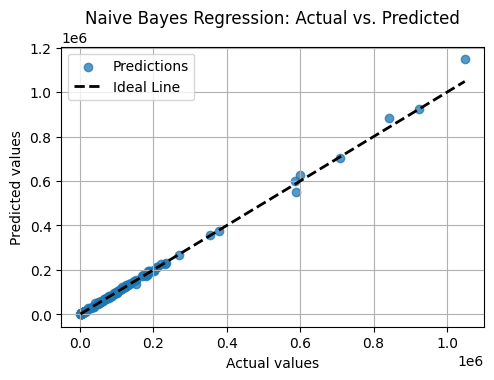

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.75, label='Predictions')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Naive Bayes Regression: Actual vs. Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal Line')  # Diagonal line for reference
plt.grid(True)
plt.legend()
plt.show()

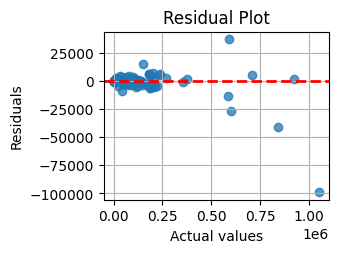

In [18]:
plt.subplot(2, 2, 2)
residuals = Y_test - Y_pred
plt.scatter(Y_test, residuals, alpha=0.75)
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Horizontal line at y=0
plt.grid(True)